In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

import keras
from keras.layers import Dense, Dropout, Activation, Flatten

Using TensorFlow backend.


In [2]:
img_rows = img_cols = 28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
input_shape = img_rows * img_cols

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [3]:
print(y_train.shape)
y_train[:3]

(60000,)


array([5, 0, 4], dtype=uint8)

In [4]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
print(y_train.shape)


(60000, 10)


In [6]:
y_train[:3,:]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [42]:
model = Sequential()
model.add(Dense(2048, activation='sigmoid', kernel_regularizer=keras.regularizers.l1(0.), input_shape=(784,)))
#model.add(Activation('sigmoid'))

model.add(Dense(1024 ,kernel_regularizer=keras.regularizers.l1(0.)) )
model.add(Activation('sigmoid'))


model.add(Dense(1024 ,kernel_regularizer=keras.regularizers.l1(0.)) )
model.add(Activation('sigmoid'))


model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [43]:
from keras.optimizers import SGD

#optimizer = SGD(lr = 0.1)

model.compile(
              optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
#model.summary()
# model.reset_states()

In [47]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=256, epochs=4)

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 31s 524us/step - loss: 2.3023 - acc: 0.1110 - val_loss: 2.3012 - val_acc: 0.1028
Epoch 2/4
60000/60000 [==============================] - 33s 542us/step - loss: 2.2985 - acc: 0.1179 - val_loss: 2.2957 - val_acc: 0.1135
Epoch 3/4
60000/60000 [==============================] - 31s 514us/step - loss: 2.2936 - acc: 0.1274 - val_loss: 2.2936 - val_acc: 0.1009
Epoch 4/4
60000/60000 [==============================] - 32s 526us/step - loss: 2.2900 - acc: 0.1368 - val_loss: 2.2918 - val_acc: 0.0980


In [46]:
print(model.predict_classes(x_test[:1]))
print(y_test[0,:])


1/1 [==============================] - 0s 70ms/step
[1]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.26973458023
Test accuracy: 0.1135


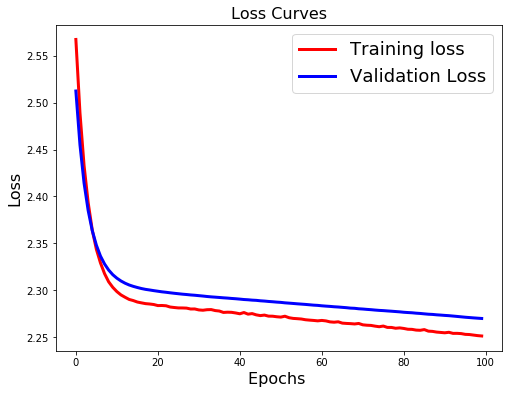

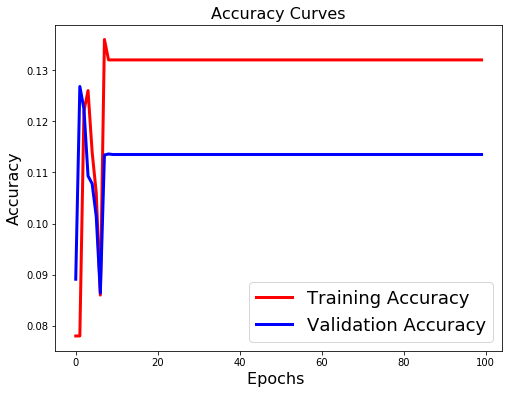

In [41]:
import matplotlib.pyplot as plt

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

